In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [5]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [6]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [7]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [8]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [9]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [10]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [12]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Single - TS LENGTH
dataset_name = 'Idaweb Swiss Temperature TS8'
ts_name_lisa = 'REH'
dimensions = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [14]:
# TS LENGTH - LISA PEARSON
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
pearson_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [15]:
# TS LENGTH - LISA DTW
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
dtw_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [16]:
# TS LENGTH - LISA GEO
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
geo_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [17]:
# TS LENGTH - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [18]:
# TS LENGTH - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [19]:
# TS LENGTH - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [20]:
# TS LENGTH - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [21]:
# TS LENGTH - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    df = dataset.dataframe[0:l]
    df_class = dataset.dataframe_class[0:l]
    df_train = training_dataset.dataframe
    df_train_class = training_dataset.dataframe_class
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [22]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [23]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[0.385, 0.022, 0.5  ],
       [0.312, 0.016, 0.4  ],
       [0.797, 0.014, 0.909],
       [0.752, 0.013, 0.894],
       [0.693, 0.014, 0.863],
       [0.646, 0.015, 0.83 ],
       [0.625, 0.019, 0.822],
       [0.697, 0.015, 0.829],
       [0.715, 0.015, 0.843],
       [0.726, 0.013, 0.851]])}, {'title': 'LISA (DTW)', 'scores': array([[0.385, 0.022, 0.5  ],
       [0.312, 0.016, 0.4  ],
       [0.733, 0.017, 0.889],
       [0.645, 0.02 , 0.84 ],
       [0.662, 0.016, 0.826],
       [0.609, 0.017, 0.792],
       [0.691, 0.014, 0.853],
       [0.723, 0.013, 0.865],
       [0.709, 0.013, 0.867],
       [0.721, 0.012, 0.872]])}, {'title': 'LISA (Vanilla)', 'scores': array([[1.   , 0.   , 1.   ],
       [0.758, 0.005, 0.857],
       [0.935, 0.003, 0.979],
       [0.94 , 0.002, 0.98 ],
       [0.943, 0.002, 0.98 ],
       [0.946, 0.002, 0.981],
       [0.958, 0.001, 0.986],
       [0.895, 0.004, 0.964],
       [0.907, 0.003, 0.969],
       [0.911

In [3]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': np.array([[0.385, 0.022, 0.5  ],
       [0.312, 0.016, 0.4  ],
       [0.797, 0.014, 0.909],
       [0.752, 0.013, 0.894],
       [0.693, 0.014, 0.863],
       [0.646, 0.015, 0.83 ],
       [0.625, 0.019, 0.822],
       [0.697, 0.015, 0.829],
       [0.715, 0.015, 0.843],
       [0.726, 0.013, 0.851]])}, {'title': 'LISA (DTW)', 'scores': np.array([[0.385, 0.022, 0.5  ],
       [0.312, 0.016, 0.4  ],
       [0.733, 0.017, 0.889],
       [0.645, 0.02 , 0.84 ],
       [0.662, 0.016, 0.826],
       [0.609, 0.017, 0.792],
       [0.691, 0.014, 0.853],
       [0.723, 0.013, 0.865],
       [0.709, 0.013, 0.867],
       [0.721, 0.012, 0.872]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[1.   , 0.   , 1.   ],
       [0.758, 0.005, 0.857],
       [0.935, 0.003, 0.979],
       [0.94 , 0.002, 0.98 ],
       [0.943, 0.002, 0.98 ],
       [0.946, 0.002, 0.981],
       [0.958, 0.001, 0.986],
       [0.895, 0.004, 0.964],
       [0.907, 0.003, 0.969],
       [0.911, 0.003, 0.97 ]])}, {'title': 'RPCA', 'scores': np.array([[0.024, 0.74 , 0.075],
       [0.001, 0.645, 0.044],
       [0.132, 0.287, 0.338],
       [0.133, 0.252, 0.313],
       [0.74 , 0.012, 0.889],
       [0.623, 0.02 , 0.806],
       [0.494, 0.043, 0.7  ],
       [0.522, 0.038, 0.722],
       [0.561, 0.033, 0.754],
       [0.756, 0.011, 0.895]])}, {'title': 'Histogram', 'scores': np.array([[0.008, 0.82 , 0.047],
       [0.005, 0.95 , 0.04 ],
       [0.006, 0.89 , 0.141],
       [0.017, 0.91 , 0.108],
       [0.011, 0.914, 0.091],
       [0.004, 0.903, 0.081],
       [0.001, 0.899, 0.098],
       [0.   , 0.89 , 0.096],
       [0.007, 0.799, 0.111],
       [0.007, 0.801, 0.105]])}, {'title': 'Cluster', 'scores': np.array([[0.016, 0.85 , 0.066],
       [0.008, 0.92 , 0.042],
       [0.063, 0.53 , 0.224],
       [0.179, 0.215, 0.358],
       [0.538, 0.03 , 0.754],
       [0.468, 0.037, 0.686],
       [0.469, 0.044, 0.687],
       [0.452, 0.048, 0.667],
       [0.47 , 0.047, 0.682],
       [0.679, 0.017, 0.847]])}, {'title': 'SVM', 'scores': np.array([[0.214, 0.12 , 0.333],
       [0.095, 0.11 , 0.214],
       [0.482, 0.063, 0.708],
       [0.394, 0.078, 0.608],
       [0.52 , 0.026, 0.667],
       [0.343, 0.033, 0.583],
       [0.336, 0.046, 0.6  ],
       [0.214, 0.07 , 0.472],
       [0.115, 0.099, 0.35 ],
       [0.11 , 0.098, 0.338]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.034, 0.62 , 0.088],
       [0.011, 0.425, 0.066],
       [0.096, 0.413, 0.271],
       [0.225, 0.168, 0.417],
       [0.216, 0.156, 0.391],
       [0.26 , 0.062, 0.507],
       [0.218, 0.1  , 0.453],
       [0.144, 0.156, 0.346],
       [0.001, 0.154, 0.054],
       [0.   , 0.155, 0.061]])}]

In [25]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [26]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimensions), max(dimensions)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [27]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Length of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimensions), max(dimensions)+1, 100))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

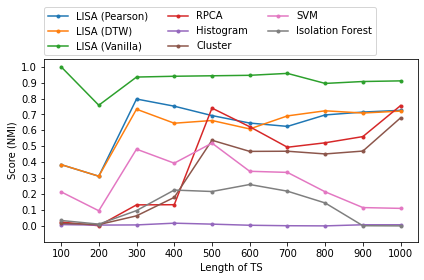

In [28]:
generate_nmi_line_chart(dimensions, scores)

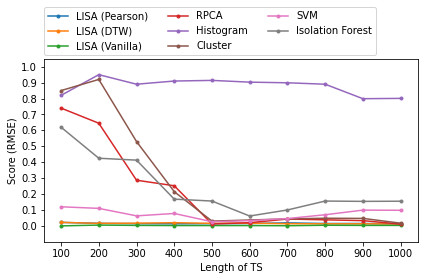

In [29]:
generate_rmse_line_chart(dimensions, scores)

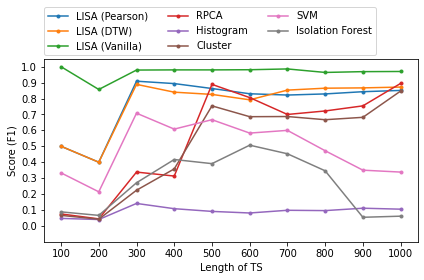

In [30]:
generate_f1_line_chart(dimensions, scores)